Training set size: (50000, 32, 32, 3)
Test set size: (10000, 32, 32, 3)
Each image size: (32, 32, 3)
Number of classes: 10
Sample labels: [[6]
 [9]
 [9]
 [4]
 [1]]
Train set distribution: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Test set distribution: {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


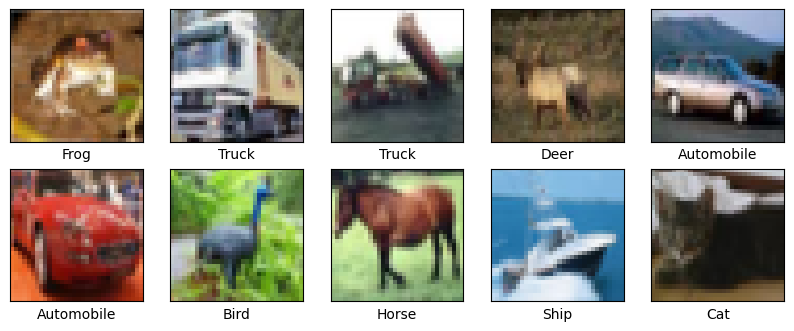

In [2]:
# 1.1 prepare the dataset


#tensorflow homework 3

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Getting fammiliar with dataset
# Dataset size
print("Training set size:", train_images.shape)
print("Test set size:", test_images.shape)

# Image size and channels
print("Each image size:", train_images.shape[1:])

# Number of classes
num_classes = len(set(train_labels.flatten()))
print("Number of classes:", num_classes)

# Show first few labels
print("Sample labels:", train_labels[:5])

# number of images per class
unique, counts = np.unique(train_labels, return_counts=True)
print("Train set distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:", dict(zip(unique, counts)))

# visuallise a sample of dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Your existing plotting code here
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [3]:
# import required libraries  
# import libraries  
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt


# // PREPROCESSING THE DATASET
def load_and_prep_cifar(batch_size, shuffle_buffer_size):
    (train_ds, test_ds) = tfds.load('cifar10', split=['train', 'test'], as_supervised=True)
    def preprocessing_func(img, label):
        img = tf.cast(img, tf.float32)
        img = (img/128) - 1            
        label = tf.one_hot(label, depth=10)
        return img, label
    
    train_ds = train_ds.map(lambda img, label: preprocessing_func(img, label))
    train_ds = train_ds.shuffle(shuffle_buffer_size).batch(batch_size).prefetch(2)
    
    test_ds = test_ds.map(lambda img, label: preprocessing_func(img, label))
    test_ds = test_ds.shuffle(shuffle_buffer_size).batch(batch_size).prefetch(2)
    return train_ds, test_ds


SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 64

train_ds, test_ds = load_and_prep_cifar(batch_size=BATCH_SIZE, shuffle_buffer_size=SHUFFLE_BUFFER_SIZE)

# // DEFINE THE HYPERPARAMETERS



In [6]:
# // 1.2 The CNN Model

# 1.2 Build the CNN Model
def build_model(input_shape, num_classes, conv_layers_config, dense_units, dropout_rate):
    input_tensor = Input(shape=input_shape)

    x = input_tensor
    for layer_conf in conv_layers_config:
        x = Conv2D(layer_conf['filters'], layer_conf['kernel_size'], activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    for units in dense_units:
        x = Dense(units, activation='relu')(x)
        x = Dropout(dropout_rate)(x)

    output_tensor = Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)
    return model


Epoch 1/15: Train Loss: 6.1576, Train Accuracy: 69.3100%, Test Loss: 0.9470, Test Accuracy: 66.8800%
Epoch 2/15: Train Loss: 3.9886, Train Accuracy: 75.8360%, Test Loss: 0.8582, Test Accuracy: 70.1500%
Epoch 3/15: Train Loss: 3.0967, Train Accuracy: 83.8680%, Test Loss: 0.7264, Test Accuracy: 75.0100%
Epoch 4/15: Train Loss: 2.3961, Train Accuracy: 86.0680%, Test Loss: 0.7960, Test Accuracy: 73.6100%
Epoch 5/15: Train Loss: 1.8147, Train Accuracy: 90.7980%, Test Loss: 0.8151, Test Accuracy: 75.5900%
Epoch 6/15: Train Loss: 1.3251, Train Accuracy: 91.4660%, Test Loss: 0.9232, Test Accuracy: 75.0500%
Epoch 7/15: Train Loss: 0.9596, Train Accuracy: 94.3380%, Test Loss: 1.0881, Test Accuracy: 75.1000%
Epoch 8/15: Train Loss: 0.7316, Train Accuracy: 94.7740%, Test Loss: 1.1881, Test Accuracy: 75.1100%
Epoch 9/15: Train Loss: 0.6168, Train Accuracy: 93.9700%, Test Loss: 1.3707, Test Accuracy: 74.6300%
Epoch 10/15: Train Loss: 0.5404, Train Accuracy: 95.4980%, Test Loss: 1.3280, Test Accuracy

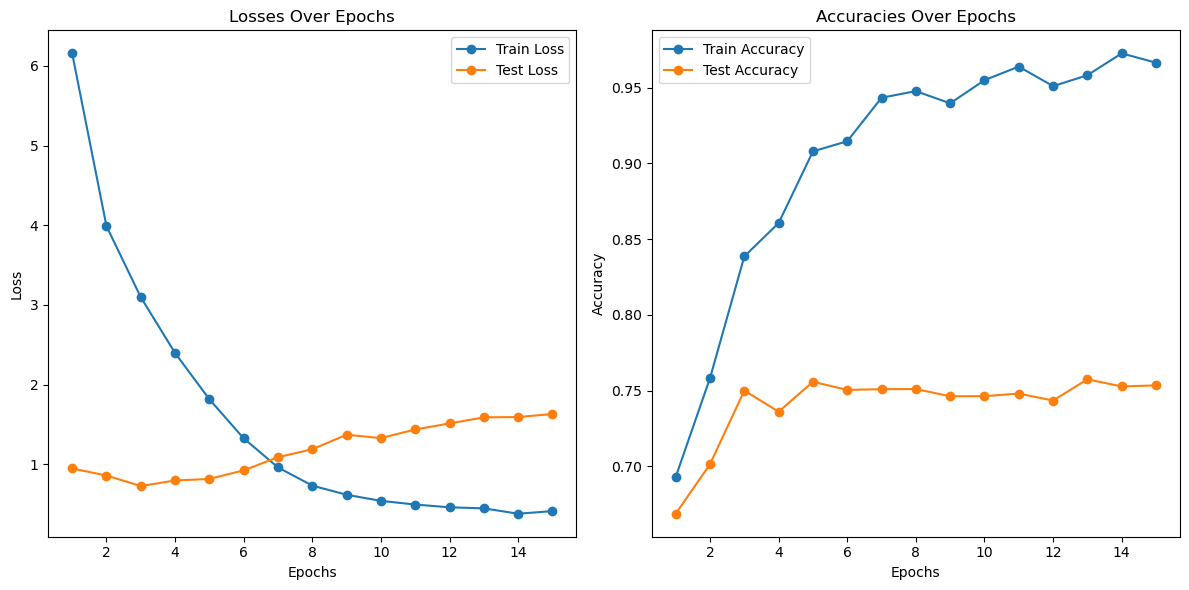

In [14]:
# // 1.4 Visualize the results (테스트용) 


import matplotlib.pyplot as plt
import datetime
import numpy as np

def plot_performance(train_losses, test_losses, train_accuracies, test_accuracies):
    epochs = np.arange(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', marker='o')
    plt.plot(epochs, test_losses, label='Test Loss', marker='o')
    plt.title('Losses Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
    plt.title('Accuracies Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



def train_and_evaluate(num_epochs, batch_size, shuffle_buffer_size, lr):
    model = build_model(input_shape, num_classes, conv_layers_config, dense_units, dropout_rate)
    data = load_and_prep_cifar(batch_size=batch_size, shuffle_buffer_size=shuffle_buffer_size)
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
    loss_f = tf.keras.losses.CategoricalCrossentropy()

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    train_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
    test_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()

    for epoch in range(num_epochs):
        # Training phase
        epoch_train_loss = 0.0
        for x_train, target_train in train_ds:
            with tf.GradientTape() as tape:
                pred_train = model(x_train)
                loss_train = loss_f(target_train, pred_train)

            gradients_train = tape.gradient(loss_train, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients_train, model.trainable_variables))

            epoch_train_loss += loss_train

        train_accuracy_metric.reset_states()
        for x_train, target_train in train_ds:
            pred_train = model(x_train)
            train_accuracy_metric.update_state(target_train, pred_train)

        # Testing phase
        epoch_test_loss = 0.0
        for x_test, target_test in test_ds:
            pred_test = model(x_test)
            loss_test = loss_f(target_test, pred_test)
            epoch_test_loss += loss_test

        test_accuracy_metric.reset_states()
        for x_test, target_test in test_ds:
            pred_test = model(x_test)
            test_accuracy_metric.update_state(target_test, pred_test)

        # Calculate and print metrics
        average_train_loss = epoch_train_loss / len(test_ds)
        average_test_loss = epoch_test_loss / len(test_ds)
        train_accuracy = train_accuracy_metric.result()
        test_accuracy = test_accuracy_metric.result()

        print(f"Epoch {epoch + 1}/{num_epochs}: "
              f"Train Loss: {average_train_loss:.4f}, Train Accuracy: {train_accuracy:.4%}, "
              f"Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.4%}")

        # Append metrics for visualization
        train_losses.append(average_train_loss)
        test_losses.append(average_test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Plot the performance
    plot_performance(train_losses, test_losses, train_accuracies, test_accuracies)

# Define your hyperparameters
SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 64
NUM_EPOCHS = 15
LR = 0.001

# Model Configuration
input_shape = (32, 32, 3)
num_classes = 10
conv_layers_config = [{'filters': 64, 'kernel_size': (3, 3)}, {'filters': 64, 'kernel_size': (3, 3)}, {'filters': 128, 'kernel_size': (3, 3)}]
dense_units = [128]
dropout_rate = 0.3
epochs = 15


# Call the training and evaluation function
train_and_evaluate(NUM_EPOCHS, BATCH_SIZE, SHUFFLE_BUFFER_SIZE, LR)


In [9]:
# // 1.3 Training the Model ((((training and testing loop))))

def train_and_evaluate(num_epochs, batch_size, shuffle_buffer_size, lr):
    model = build_model(input_shape, num_classes, conv_layers_config, dense_units, dropout_rate)
    data = load_and_prep_cifar(batch_size=batch_size, shuffle_buffer_size=shuffle_buffer_size)
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
    loss_f = tf.keras.losses.CategoricalCrossentropy()
    
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
  
    train_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
    test_accuracy_metric = tf.keras.metrics.CategoricalAccuracy()

    for epoch in range(num_epochs):
        # Training phase
        epoch_train_loss = 0.0
        for x_train, target_train in train_ds:
            with tf.GradientTape() as tape:
                pred_train = model(x_train)
                loss_train = loss_f(target_train, pred_train)

            gradients_train = tape.gradient(loss_train, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients_train, model.trainable_variables))
            
            epoch_train_loss += loss_train

        train_accuracy_metric.reset_states()
        for x_train, target_train in train_ds:
            pred_train = model(x_train)
            train_accuracy_metric.update_state(target_train, pred_train)

        # Testing phase
        epoch_test_loss = 0.0
        for x_test, target_test in test_ds:
            pred_test = model(x_test)
            loss_test = loss_f(target_test, pred_test)
            epoch_test_loss += loss_test

        test_accuracy_metric.reset_states()
        for x_test, target_test in test_ds:
            pred_test = model(x_test)
            test_accuracy_metric.update_state(target_test, pred_test)

        # Calculate and print metrics
        average_train_loss = epoch_train_loss / len(test_ds)
        average_test_loss = epoch_test_loss / len(test_ds)
        train_accuracy = train_accuracy_metric.result()
        test_accuracy = test_accuracy_metric.result()

        print(f"Epoch {epoch + 1}/{num_epochs}: "
              f"Train Loss: {average_train_loss:.4f}, Train Accuracy: {train_accuracy:.4%}, "
              f"Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.4%}")
        
        # Append metrics for visualization
        train_losses.append(average_train_loss)
        test_losses.append(average_test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
        return train_losses, test_losses, train_accuracies, test_accuracies

# Define your hyperparameters
SHUFFLE_BUFFER_SIZE = 1000
BATCH_SIZE = 64
NUM_EPOCHS = 3
LR = 0.003

# Call the training and evaluation function
train_and_evaluate(NUM_EPOCHS, BATCH_SIZE, SHUFFLE_BUFFER_SIZE, LR)


Epoch 1/3: Train Loss: 6.0357, Train Accuracy: 68.6240%, Test Loss: 1.0141, Test Accuracy: 64.9800%


([<tf.Tensor: shape=(), dtype=float32, numpy=6.0356574>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=1.0141431>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=0.68624>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=0.6498>])

In [10]:
# // 1.4 Visualize the results (I try to seperate the function) 
import datetime

def plot_performance(train_losses, test_losses, train_accuracies, test_accuracies):
    epochs = np.arange(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))

    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', marker='o')
    plt.plot(epochs, test_losses, label='Test Loss', marker='o')
    plt.title('Losses Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
    plt.title('Accuracies Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the training and evaluation function
plot_performance(train_losses, test_losses, train_accuracies, test_accuracies)

    


NameError: name 'train_losses' is not defined